# Importing Data and Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

# Modelling

## Sampling and Splitting

In [ ]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

smote = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X,y)

print(X_resampled.shape, X.shape)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

(1000, 8) (768, 8)


## Logistic Regression

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])


param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'lbfgs'],
    'logreg__max_iter': [100, 200, 500, 700, 1000]

}

model = GridSearchCV(pipeline, param_grid=param_grid, cv = 3, n_jobs = -1, scoring = "accuracy")

model.fit(X_train, y_train)

print(f"Best Parameters: {model.best_params_}")
print(f"Best Cross-Validation Accuracy: {model.best_score_:.4f}")


test_accuracy =  model.best_estimator_.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Parameters: {'logreg__C': 0.01, 'logreg__max_iter': 100, 'logreg__solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.7550
Test Accuracy: 0.7450


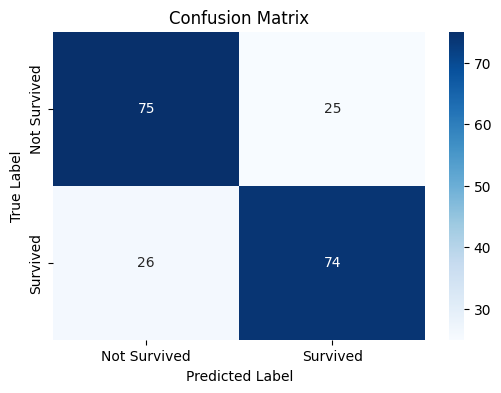

In [ ]:
plt.figure(figsize=(6,4))

y_pred = model.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## K Nearest Neigbours Classifier

In [ ]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': [3, 4, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

model_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring="accuracy")

model_knn.fit(X_train, y_train)

print(f"Best Parameters for KNN: {model_knn.best_params_}")
print(f"Best Cross-Validation Accuracy: {model_knn.best_score_:.4f}")

test_accuracy_knn = model_knn.best_estimator_.score(X_test, y_test)
print(f"Test Accuracy for KNN: {test_accuracy_knn:.4f}")

Best Parameters for KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 4, 'knn__weights': 'distance'}
Best Cross-Validation Accuracy: 0.8025
Test Accuracy for KNN: 0.8200


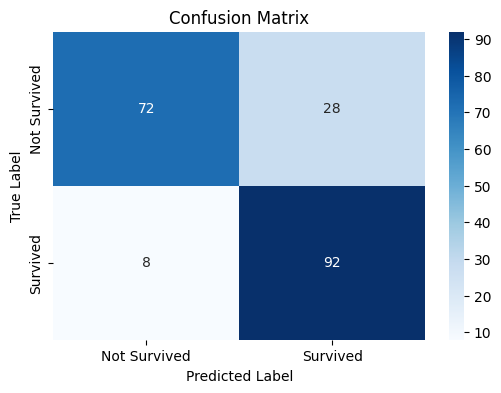

In [ ]:
plt.figure(figsize=(6,4))

y_pred = model_knn.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Random Forest Classifier

In [ ]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__bootstrap': [True, False],
    'rf__criterion': ['gini', 'entropy']
}

model_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring="accuracy", verbose = 1)

model_rf.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {model_rf.best_params_}")
print(f"Best Cross-Validation Accuracy: {model_rf.best_score_:.4f}")

test_accuracy_rf = model_rf.best_estimator_.score(X_test, y_test)
print(f"Test Accuracy for Random Forest: {test_accuracy_rf:.4f}")

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Best Parameters for Random Forest: {'rf__bootstrap': False, 'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best Cross-Validation Accuracy: 0.8250
Test Accuracy for Random Forest: 0.8500


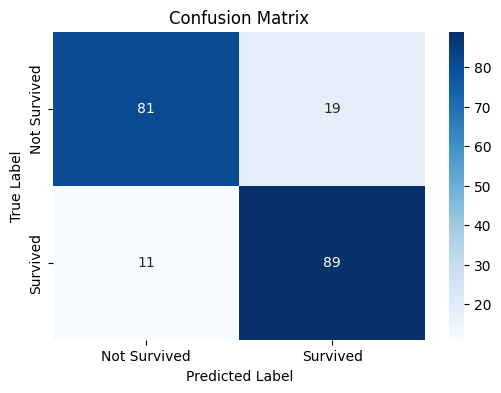

In [ ]:
plt.figure(figsize=(6,4))

y_pred = model_rf.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()